## Week 1: Coding Video Notebook

In this notebook, we will demonstrate how to set up a Keras/Tensorflow network to perform 
regression on the CA Housing dataset, and then show how to perform binary classification on the Pima Indians Diabetes Dataset. 

In [1]:
# Imports and global variables

import numpy as np
import os
import pandas as pd
import kagglehub
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Suppresses INFO and WARNING messages

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Sequential

import matplotlib.pyplot as plt

random_state = 42

## Part A: Setting up a basic neural network for regression on the CA Housing Dataset

### A.1: Data Preprocessing

This dataset has already been cleaned up so there are no missing or categorical values. As with the methods in Module 3, neural networks need all features to be floating-point numbers. 

We'll load the dataset and split it into training and testing sets and then standardize the features.   

**Note: Standardization is crucial for training neural networks effectively.**

In [2]:
# Load the California Housing dataset as Numpy arrays
housing = fetch_california_housing()
X, y = housing.data, housing.target  # Features and target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f'X_train_scaled.shape = {X_train_scaled.shape}')
print(f'X_test_scaled.shape = {X_test_scaled.shape}')

X_train_scaled.shape = (16512, 8)
X_test_scaled.shape = (4128, 8)


### A.2: Network Architecture 

The input layer is determined by the number of features and the output has a single neural without an activation function. In between, we may choose any architecture we wish, 
but it is typical to have hidden layers decrease in size toward the output; we'll use two
hidden layers of widths 64 and then 32 and use the `relu` activation. 

A single neuron is basically just a little **logistic regression** machine using *sigmoid* or *relu* or another non-linear activation function:

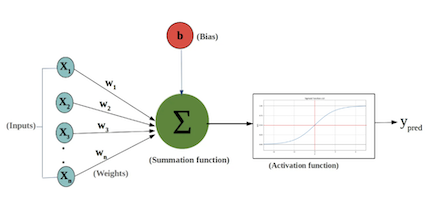


>`Sequential` is a Keras model class that builds a neural network layer by layer, in a linear (stacked) sequence;     
>`Dense` means that the layer is fully-connected to the previous layer.

For **regression** tasks, the output is  a single neuron **without** the activation function:

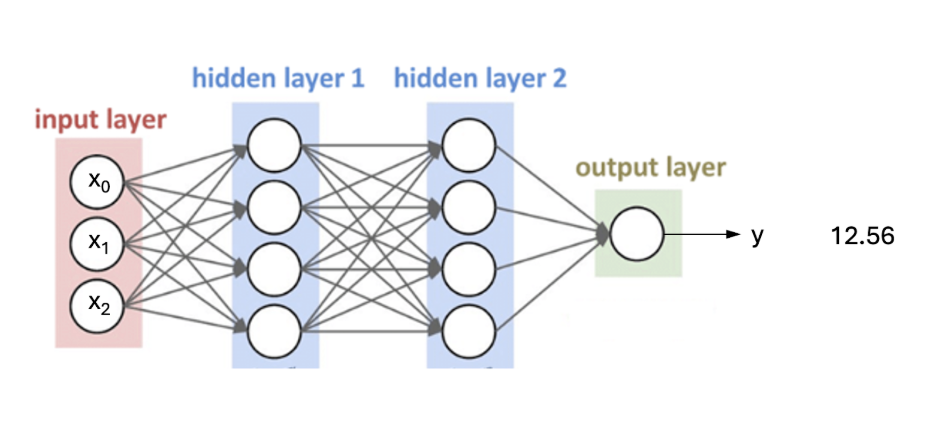

In [3]:
# We use Sequential to build a simple regression network from
# a list of layers, and print the summary

regression_model = keras.Sequential(
    [
       keras.layers.Input(shape=(X_train.shape[1],)),     # Explicit input layer
       keras.layers.Dense(64, activation="sigmoid"),      # Two hidden layers with sigmoid
       keras.layers.Dense(32, activation="sigmoid"),
       keras.layers.Dense(1)                              # Output with no activation for regression
    ]
)

# Print model summary
regression_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

### A.3 Compile and Train the Model 

Next, we `compile` the model and training using the `fit` method. There are two hyperparameters we
need to specify:
- The `optimizer` is the algorithm used to do gradient descent during training; for now we'll use `sgd`, which stands for
  *stochastic gradient descent*.
- The `loss` function is the error between the actual targets and the predictions made by the model; for regression we'll use
  the familiar `mse`.  

We will explain both of these in detail next week. 


In [4]:
# Compile the model using stochastic gradient descent

regression_model.compile(optimizer='sgd', loss='mse') 

The `fit` method will train the network over many cycles, called **epochs**.  In each epoch, we're trying to minimize a measure of how wrong the model is, measured by the loss function. 

For now we'll simply run it for 20 epochs. 


In [18]:
# Train the model

n_epochs = 20

regression_history = regression_model.fit(X_train_scaled, 
                                          y_train, 
                                          epochs  = n_epochs,     # Specify the number of iterations of training 
                                          verbose = 0             # run silently
                                         )

Epoch 1/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4522
Epoch 2/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4534
Epoch 3/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4445
Epoch 4/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4376
Epoch 5/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4455
Epoch 6/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4329
Epoch 7/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4542
Epoch 8/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4361
Epoch 9/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4515
Epoch 10/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4285
Epoch 11/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4312
Epoch 12/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4252
Epoch 13/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4404
Epoch 14/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4186
Epoch 15/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - lo

The fit method returns a history object, a dictionary which records what happened during training. Here, it will record the loss, averaged over all samples in each epoch.

In [6]:
regression_history.history.keys()

dict_keys(['loss'])

In [7]:
regression_history.history['loss']

[1.1230415105819702,
 0.7055079936981201,
 0.5838122367858887,
 0.5520001649856567,
 0.5295210480690002,
 0.5124726891517639,
 0.4994146525859833,
 0.4902217388153076,
 0.4837132394313812,
 0.479670912027359,
 0.4766112267971039,
 0.47316572070121765,
 0.4706515073776245,
 0.46912622451782227,
 0.4661121666431427,
 0.46383705735206604,
 0.4622979760169983,
 0.4602763056755066,
 0.45839908719062805,
 0.4556649327278137]

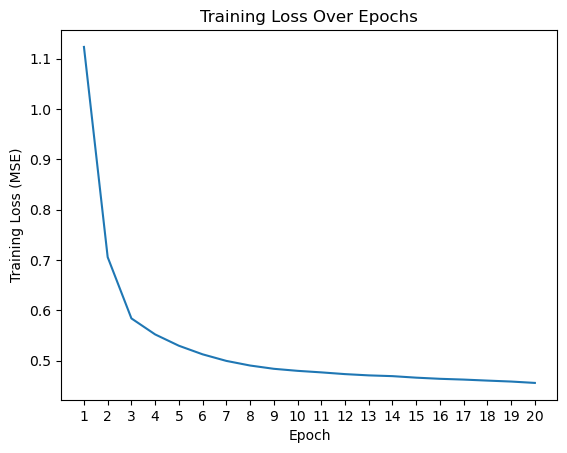

Final Training Loss: 0.4557


In [8]:
plt.title("Training Loss Over Epochs")
plt.plot(range(1,n_epochs+1),regression_history.history["loss"])
plt.xlabel("Epoch")
plt.ylabel("Training Loss (MSE)")
plt.xticks(range(1, n_epochs + 1)) 
plt.show()

print(f'Final Training Loss: {regression_history.history["loss"][-1]:.4f}')

### A.4 Test and Predict

To run the trained model on the test set, we use the `evaluate` method. 

In [9]:
# Evaluate on test set
test_loss = regression_model.evaluate(X_test_scaled, y_test,verbose=0)
print(f"Test Loss: {test_loss:.4f}")

Test Loss: 0.4732


To make new predictions using the model, we use the `predict` method. 

In [10]:
# Make predictions (we'll just use the test set for simplicity)

y_pred = regression_model.predict(X_test_scaled,verbose=0)

# Display some predictions
for i in range(5):
    print(f"Actual: {y_test[i]:.2f}, Predicted: {y_pred[i][0]:.2f}")

Actual: 0.48, Predicted: 0.65
Actual: 0.46, Predicted: 1.72
Actual: 5.00, Predicted: 3.03
Actual: 2.19, Predicted: 2.85
Actual: 2.78, Predicted: 2.61


## Part B: Neural Network for Binary Classification on the Pima Indians Diabetes Dataset

### B.1: Data Preprocessing

In [11]:
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")
print("Path to dataset files:", path)

filename = 'diabetes.csv'

# Construct the full path to the CSV file and load it into a DataFrame
csv_path = os.path.join(path, filename)
df = pd.read_csv(csv_path)


Path to dataset files: /Users/waynesnyder/.cache/kagglehub/datasets/uciml/pima-indians-diabetes-database/versions/1


### Important Digression: Is your dataset a DataFrame or a Numpy array?

Pandas DataFrames are great for preprocessing and exploration because they keep column names and data types. But when training neural networks, it’s standard practice to switch to **Numpy arrays** (or tensors).

This is especially important because:

> **`validation_split=0.2` only works with Numpy arrays or tensors—not Dataframes—since Keras internally slices the data.**

So, **if you start with a DataFrame, convert it to Numpy** after preprocessing is complete:

```python
X = df.drop("target", axis=1).to_numpy()
y = df["target"].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
```

This ensures your data is ready for Keras and avoids subtle bugs related to slicing or indexing.



In [12]:
# Convert to Numpy arrays
X2 = df.drop('Outcome', axis=1).to_numpy()
y2 = df['Outcome'].to_numpy()

# Split and scale
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
scaler2 = StandardScaler()
X2_train_scaled = scaler2.fit_transform(X2_train)
X2_test_scaled = scaler2.transform(X2_test)

### B.2: Network Architecture 

We'll use a single dense layer with a single sigmoid neuron on output. 


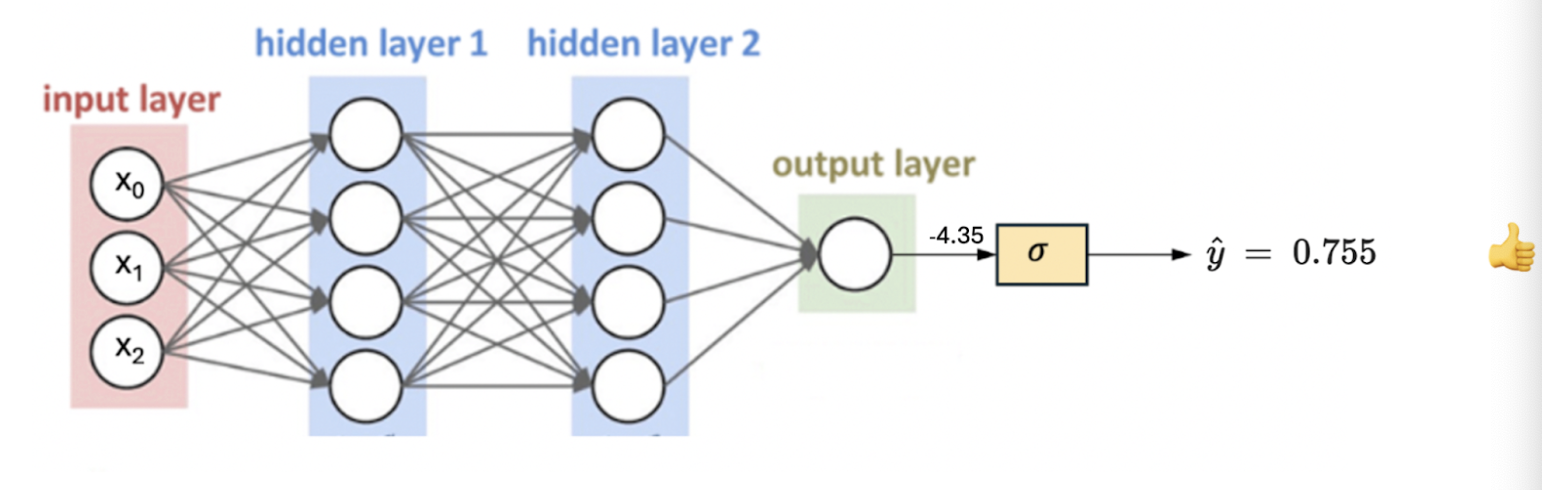

In [23]:
# Build model
classification_model = keras.Sequential(
    [
      keras.layers.Input(shape=(X2_train_scaled.shape[1],)),  # Explicit input layer
      keras.layers.Dense(64, activation='relu'),
      keras.layers.Dense(1, activation='sigmoid')
    ]
)

### B.3 Compile and Train the Model with Accuracy Metric

For binary classification problems, the loss function we use is 
`binary_crossentropy`, but to measure how well our model is performing we use the `accuracy` metric, which will be averaged
over all samples at the end of each epoch. Both will be
tracked during training and stored in the history object. 

In [24]:
classification_model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
# Train
n_epochs = 20
classification_history = classification_model.fit( X2_train_scaled, 
                                                   y2_train,
                                                   epochs=n_epochs,
                                                   verbose=0
                                                 )

In [26]:
classification_history.history.keys()

dict_keys(['accuracy', 'loss'])

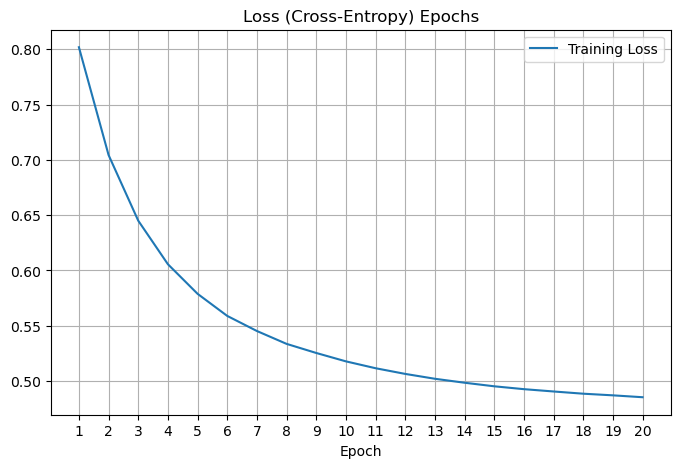

Final Loss: 0.4853


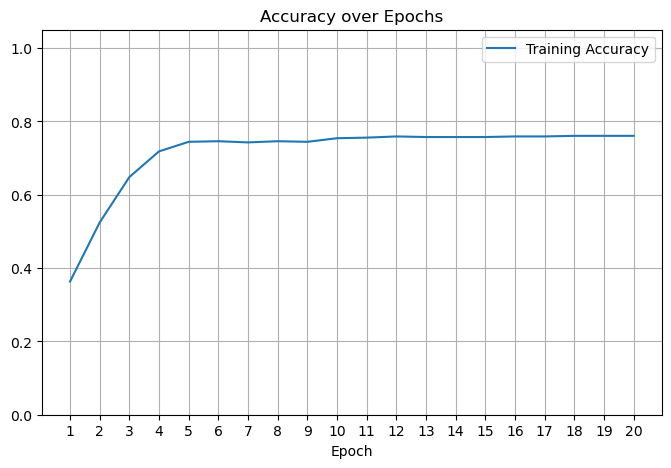

Final Accuracy: 0.7606



In [27]:
# Plotting Cross-Entropy Loss and Accuracy

plt.figure(figsize=(8, 5))
plt.title('Loss (Cross-Entropy) Epochs')
plt.plot(range(1,n_epochs+1),classification_history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.xticks(range(1, n_epochs + 1)) 
plt.legend()
plt.grid()
plt.show()

a = classification_history.history['loss'][-1]
print(f'Final Loss: {a:.4f}')

plt.figure(figsize=(8, 5))
plt.title('Accuracy over Epochs')
plt.plot(range(1,n_epochs+1),classification_history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylim([0,1.05])
plt.xticks(range(1, n_epochs + 1)) 
plt.legend()
plt.grid()
plt.show()
a = classification_history.history['accuracy'][-1]
print(f'Final Accuracy: {a:.4f}')
print()

In [17]:
# Evaluate
loss, accuracy = classification_model.evaluate(X2_test_scaled, y2_test,verbose=0)
print(f'Test Accuracy: {accuracy:.4f}')

Test Accuracy: 0.7532


### ⚠️ Final Note: Watch Out!

There is a small but easily overlooked issue with the `fit()` method in Keras:  
>If you call `fit()` more than once on the same model, it **resumes training from where it left off** — it does not start over.

Recompiling the model does *not* reset the weights.  
To truly start fresh, you must **rebuild the model** from scratch (i.e., call your `build_model()` function again).


